# Chapter 6: Optimization

Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

The source code listings can be downloaded from http://www.apress.com/9781484205549

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'

In [2]:
import numpy as np
import sympy

In [27]:
sympy.init_printing()

In [24]:
from scipy import optimize

In [25]:
import cvxopt

In [26]:
from __future__ import division

## Univariate

In [10]:
r, h = sympy.symbols("r, h") # for radius and height

In [11]:
area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h # funcion objetivo

In [12]:
volume = sympy.pi * r**2 * h # restriccion

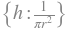

In [16]:
h_r = sympy.solve(volume - 1)[0]
h_r

In [19]:
area_r = area.subs(h_r)
area_r

In [25]:
rsol = sympy.solve(area_r.diff(r))[0] # diff is derivative of 
rsol

In [26]:
_.evalf()

In [34]:
# verify that the second derivative is positive, so that rsol is a minimum
area_r.diff(r, 2).subs(r, rsol)

In [36]:
area_r.subs(r, rsol)  # igual que sin derivar diff(r,0)

In [37]:
_.evalf()

In [38]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r

In [39]:
r_min = optimize.brent(f, brack=(0.1, 10))

In [40]:
r_min

In [41]:
f(r_min)

In [42]:
optimize.minimize_scalar(f, bracket=(0.1, 10))

     fun: 5.535810445932086
    nfev: 20
     nit: 16
 success: True
       x: 0.5419260633415537

In [53]:
r = np.linspace(0.01, 2, 100)
r

array([0.01      , 0.03010101, 0.05020202, 0.07030303, 0.09040404,
       0.11050505, 0.13060606, 0.15070707, 0.17080808, 0.19090909,
       0.2110101 , 0.23111111, 0.25121212, 0.27131313, 0.29141414,
       0.31151515, 0.33161616, 0.35171717, 0.37181818, 0.39191919,
       0.4120202 , 0.43212121, 0.45222222, 0.47232323, 0.49242424,
       0.51252525, 0.53262626, 0.55272727, 0.57282828, 0.59292929,
       0.6130303 , 0.63313131, 0.65323232, 0.67333333, 0.69343434,
       0.71353535, 0.73363636, 0.75373737, 0.77383838, 0.79393939,
       0.8140404 , 0.83414141, 0.85424242, 0.87434343, 0.89444444,
       0.91454545, 0.93464646, 0.95474747, 0.97484848, 0.99494949,
       1.01505051, 1.03515152, 1.05525253, 1.07535354, 1.09545455,
       1.11555556, 1.13565657, 1.15575758, 1.17585859, 1.1959596 ,
       1.21606061, 1.23616162, 1.25626263, 1.27636364, 1.29646465,
       1.31656566, 1.33666667, 1.35676768, 1.37686869, 1.3969697 ,
       1.41707071, 1.43717172, 1.45727273, 1.47737374, 1.49747

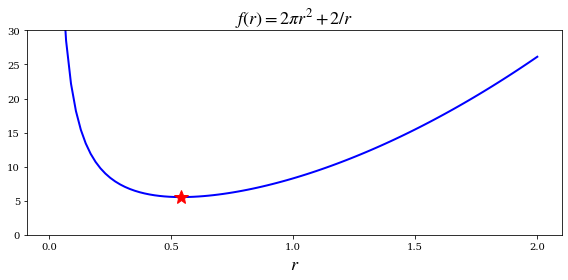

In [55]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(r, f(r), lw=2, color='b')
ax.plot(r_min, f(r_min), 'r*', markersize=15)
ax.set_title(r"$f(r) = 2\pi r^2+2/r$", fontsize=18)
ax.set_xlabel(r"$r$", fontsize=18)
ax.set_xticks([0, 0.5, 1, 1.5, 2])
ax.set_ylim(0, 30)

fig.tight_layout()
# fig.savefig('ch6-univariate-optimization-example.pdf')

## Two-dimensional

In [3]:
x1, x2 = sympy.symbols("x_1, x_2")

In [30]:
f_sym = (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2/(x1)

In [31]:
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]

In [32]:
# Gradient
sympy.Matrix(fprime_sym)

/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextoo

⎡          3⎤
⎢4⋅(x₁ - 1) ⎥
⎢           ⎥
⎣10⋅x₂ - 12 ⎦

In [33]:
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)]

In [34]:
# Hessian
sympy.Matrix(fhess_sym)

⎡           2    ⎤
⎢12⋅(x₁ - 1)   0 ⎥
⎢                ⎥
⎣     0        10⎦

In [35]:
f_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')

In [36]:
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')

In [37]:
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

In [38]:
def func_XY_X_Y(f):
    """
    Wrapper for f(X) -> f(X[0], X[1])
    """
    return lambda X: np.array(f(X[0], X[1]))

# To obtain functions 
# that are compatible with the SciPy optimization routines, we wrap each of the functions 
# generated by sympy.lambdify with a Python function that rearranges the arguments:

In [40]:
f = func_XY_X_Y(f_lmbda)

In [41]:
fprime = func_XY_X_Y(fprime_lmbda)

In [42]:
fhess = func_XY_X_Y(fhess_lmbda)

In [44]:
X_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess, maxiter=50)

Optimization terminated successfully.
         Current function value: -2.200000
         Iterations: 14
         Function evaluations: 14
         Gradient evaluations: 14
         Hessian evaluations: 14


In [46]:
X_opt

# This is the minimum poin of f(x)

array([0.99514042, 1.2       ])

In [49]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -2.200000
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15


In [51]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)
x_opt

Optimization terminated successfully.
         Current function value: -2.200000
         Iterations: 19
         Function evaluations: 39
         Gradient evaluations: 39


array([0.9999276, 1.2      ])

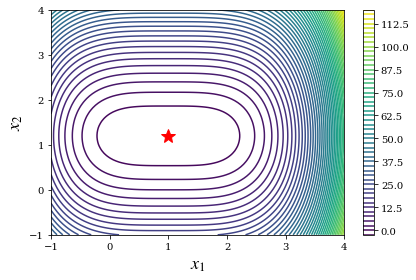

In [47]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(X_opt[0], X_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()
# fig.savefig('ch6-examaple-two-dim.pdf');

## Brute force search for initial point

In [63]:
def f(X):
    x, y = X
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + ((x - 1)**2 + (y - 1)**2)/(x+0.001)

In [64]:
x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), finish=None)

In [65]:
x_start

array([-0.5, -3. ])

In [66]:
f(x_start)

/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextoo

In [67]:
x_opt = optimize.fmin_bfgs(f, x_start)

         Current function value: -40.573146
         Iterations: 0
         Function evaluations: 176
         Gradient evaluations: 57


In [68]:
x_opt

array([-0.5, -3. ])

In [69]:
f(x_opt)

/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/IPython/lib/latextoo

In [70]:
def func_X_Y_to_XY(f, X, Y):
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

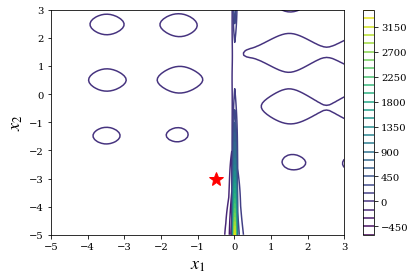

In [74]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-5, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()
# fig.savefig('ch6-example-2d-many-minima.pdf');

For clarity, here we have 
favored explicitly calling functions for specific solvers, but in general it is a good idea to 
use optimize.minimize, as this makes it easier to switch between different solvers. 
For example, in the previous example, where we used optimize.fmin_bfgs in the 
following way.

In [82]:
x_opt = optimize.fmin_bfgs(f, x_start)
x_opt

         Current function value: -40.573146
         Iterations: 0
         Function evaluations: 176
         Gradient evaluations: 57


array([-0.5, -3. ])

In [81]:
result = optimize.minimize(f, x_start, method= 'BFGS')

In [83]:
result.x == x_opt

array([ True,  True])

## Nonlinear least square

In [108]:
def f(x, beta0, beta1, beta2):
    return beta0**2 + beta1 * np.exp(-beta2 * x**2)*(x+0.01)

# To illustrate how this function can be used, consider a nonlinear model on the form

In [109]:
beta = (0.25, 0.75, 0.5)

In [130]:
xdata = np.linspace(0, 5, 100)

In [131]:
y = f(xdata, * beta)

In [132]:
ydata = y + 0.05 * np.random.randn(len(xdata))

In [123]:
def g(beta):
    return ydata - f(xdata, *beta)

In [124]:
beta_start = (1, 1, 1)

In [133]:
beta_opt, beta_cov = optimize.leastsq(g, beta_start)

In [134]:
print(beta_opt)
print(beta_cov)

[0.24546208 0.75877271 0.5085816 ]
1


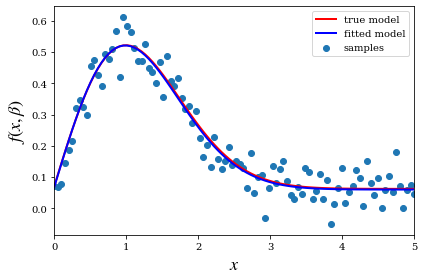

In [135]:
fig, ax = plt.subplots()

ax.scatter(xdata, ydata, label="samples")
ax.plot(xdata, y, 'r', lw=2, label="true model")
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label="fitted model")
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
fig.tight_layout()
# fig.savefig('ch6-nonlinear-least-square.pdf')

In [136]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)

In [137]:
beta_opt

array([0.24546208, 0.75877271, 0.5085816 ])

## Constrained optimization

### Bounds

In [146]:
def f(X):
    x, y = X
    return (x-1)**2 + (y-1)**2 + (x*y)

In [151]:
x_opt = optimize.minimize(f, [0, 0], method='BFGS').x
x_opt

array([0.66666666, 0.66666666])

In [148]:
bnd_x1, bnd_x2 = (2, 3), (1, 3)

In [152]:
x_cons_opt = optimize.minimize(f, [0, 0], method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x
x_cons_opt

array([2., 1.])

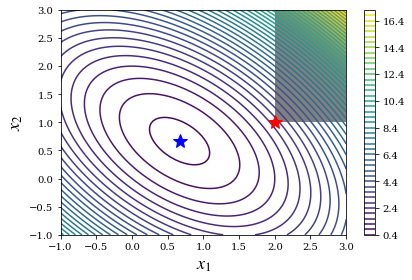

In [150]:
fig, ax = plt.subplots(figsize=(6, 4))

x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)

c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)

ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)

bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]), 
                           bnd_x1[1] - bnd_x1[0], bnd_x2[1] - bnd_x2[0],
                           facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

fig.tight_layout()
# fig.savefig('ch6-example-constraint-bound.pdf');

## Lagrange multiplier

In [153]:
x = x1, x2, x3, l = sympy.symbols("x_1, x_2, x_3, lambda")

In [168]:
f = (x1 * x2 * x3) / x1**2

In [155]:
g = 2 * (x1 * x2 + x2 * x3 + x3 * x1) - 1

In [169]:
L = f + l * g
L

In [170]:
grad_L = [sympy.diff(L, x_) for x_ in x]

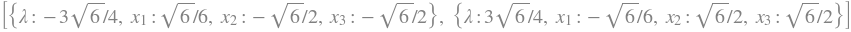

In [171]:
sols = sympy.solve(grad_L)
sols

In [172]:
g.subs(sols[0])

In [173]:
f.subs(sols[0])

In [174]:
def f(X):
    return (-X[0] * X[1] * X[2])/ X[0]**2

In [175]:
def g(X):
    return 2 * (X[0]*X[1] + X[1] * X[2] + X[2] * X[0]) - 1

In [177]:
constraints = [dict(type='eq', fun=g)]
constraints

[{'type': 'eq', 'fun': <function __main__.g(X)>}]

In [178]:
result = optimize.minimize(f, [0.5, 1, 1.5], method='SLSQP', constraints=constraints)

In [179]:
result

     fun: 3.674234614026312
     jac: array([8.99999875, 2.99999988, 2.99999955])
 message: 'Optimization terminated successfully'
    nfev: 88
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([-0.40824836,  1.22474491,  1.22474504])

In [180]:
result.x

array([-0.40824836,  1.22474491,  1.22474504])

## Inequality constraints

In [202]:
def f(X):
    return ((X[0] - 1)**2 + (X[1] - 1)**2) + 2*(X[1]*X[0])

def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**4

# g(x) = x1 − 1.75 − (x0 − 0.75)4 ≥ 0. A

In [204]:
%time x_opt = optimize.minimize(f, (0, 0), method='BFGS').x

CPU times: user 3.99 ms, sys: 0 ns, total: 3.99 ms
Wall time: 3.37 ms


In [205]:
constraints = [dict(type='ineq', fun=g)]

In [209]:
%time x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP', constraints=constraints).x
x_cons_opt

CPU times: user 12.6 ms, sys: 476 µs, total: 13.1 ms
Wall time: 17.5 ms


array([0.12003938, 1.90749023])

In [210]:
%time x_cons_opt = optimize.minimize(f, (0, 0), method='COBYLA', constraints=constraints).x
x_cons_opt

CPU times: user 2.35 ms, sys: 3 µs, total: 2.35 ms
Wall time: 2.41 ms


array([0.12013382, 1.90739578])

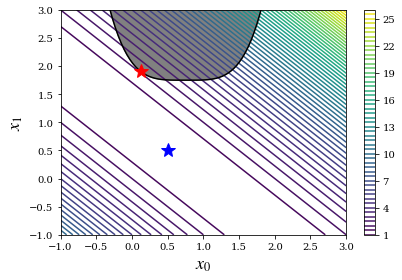

In [208]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)

ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color="grey")
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)

ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)

fig.tight_layout()
# fig.savefig('ch6-example-constraint-inequality.pdf');

## Linear programming

In [220]:
c = np.array([-1.0, 2.0, -3.0])

A = np.array([[ 1.0, 1.0, 0.0],
              [-1.0, 2.0, 0.0],
              [ 0.0, -1.0, 1.0]])

b = np.array([1.0, 2.5, 3.0])

In [221]:
A_ = cvxopt.matrix(A)
b_ = cvxopt.matrix(b)
c_ = cvxopt.matrix(c)
c_

<3x1 matrix, tc='d'>

In [222]:
sol = cvxopt.solvers.lp(c_, A_, b_)
sol

Optimal solution found.


{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 6.661338147750937e-16,
 'relative gap': 6.661338147750939e-17,
 'primal objective': -9.999999999999998,
 'dual objective': -10.0,
 'primal infeasibility': 0.0,
 'primal slack': -0.0,
 'dual slack': 1.1102230246251565e-16,
 'dual infeasibility': 1.0698376758482636e-16,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 0}

In [223]:
x = np.array(sol['x'])

In [224]:
x

array([[-0.16666667],
       [ 1.16666667],
       [ 4.16666667]])

In [218]:
sol

{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.5543122344752192e-15,
 'relative gap': 1.5543122344752196e-16,
 'primal objective': -9.999999999999998,
 'dual objective': -10.0,
 'primal infeasibility': 1.2234061875101338e-16,
 'primal slack': 2.220446049250313e-16,
 'dual slack': 1.1102230246251565e-16,
 'dual infeasibility': 1.0698376758482636e-16,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 0}

In [225]:
sol['primal objective']

## Quandratic problem with cvxopt

Quadratic problem formulation:
    
$\min \frac{1}{2}x^TPx + q^T x$

$G x \leq h$ 

For example, let's solve the problem

min $f(x_1, x_2) = (x_1 - 1)^2 + (x_2 - 1)^2 =$

$x_1^2 -2x_1 + 1 + x_2^2 - 2x_2 + 1 = $

$x_1^2 + x_2^2 - 2x_1 - 2x_2 + 2 =$

$= \frac{1}{2} x^T P x - q^T x + 2$

and

$\frac{3}{4} x_1 + x_2 \geq 3$, $x_1 \geq 0$

where

$P = 2 [[1, 0], [0, 1]]$ and $q = [-2, -2]$

and

$G = [[-3/4, -1], [-1, 0]]$ and $h = [-3, 0]$

In [226]:
from cvxopt import matrix, solvers

P = 2 * np.array([[1.0, 0.0],
                  [0.0, 1.0]])

q = np.array([-2.0, -2.0])

G = np.array([[-0.75, -1.0],
              [-1.0,  0.0]])

h = np.array([-3.0, 0.0])

In [227]:
_P = cvxopt.matrix(P)
_q = cvxopt.matrix(q)
_G = cvxopt.matrix(G)
_h = cvxopt.matrix(h)

In [228]:
%time sol = solvers.qp(_P, _q, _G, _h)

     pcost       dcost       gap    pres   dres
 0: -1.7901e+00 -2.0988e-01  6e+00  9e-01  1e+00
 1: -7.1216e-01 -1.2878e+00  6e-01  1e-16  3e-16
 2: -9.9733e-01 -1.0027e+00  5e-03  0e+00  8e-17
 3: -9.9997e-01 -1.0000e+00  5e-05  2e-16  0e+00
 4: -1.0000e+00 -1.0000e+00  5e-07  1e-16  1e-16
Optimal solution found.
CPU times: user 8.89 ms, sys: 85 µs, total: 8.98 ms
Wall time: 6.74 ms


In [ ]:
# sol

In [229]:
x = sol['x']

In [232]:
x = np.array(x)
x

array([[1.60000013],
       [1.80000007]])

In [231]:
sol['primal objective'] + 2

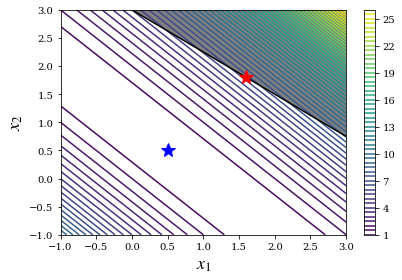

In [235]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)

y_ = (h[0] - G[0, 0] * x_)/G[0, 1]
mask = y_ < 3
angle = -np.arctan((y_[mask][0] - y_[mask][-1]) / (x_[mask][-1]- x_[mask][0])) * 180 / np.pi

ax.plot(x_, y_, 'k')
ax.add_patch(plt.Rectangle((0, 3), 4, 3, angle=angle, facecolor="grey"))

ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x[0], x[1], 'r*', markersize=15)

ax.set_ylim(-1, 3)
ax.set_xlim(-1, 3)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

fig.tight_layout()
# fig.savefig('ch6-example-quadratic-problem-constraint-inequality.pdf');

# Arbitrary function callback API

## Versions

In [ ]:
%reload_ext version_information

In [ ]:
%version_information numpy, scipy, cvxopt, sympy, matplotlib